In [1]:
%matplotlib inline

from pathlib import Path
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

# 3. 통계적 실험과 유의성검정

- 실험설계: 사실상 모든 응용 연구 분야에서 통계분석의 토대가 됨

- 실험설계의 목표: 어떤 가설을 확인하거나 기각하기

- 전형적인 통계적 추론 파이프라인
    - 가설을 세운다 -> 실험을 설계한다 -> 데이터를 수집한다 -> 추론(inference: 제한된 데이터의 실험 결과를 더 큰 과정 또는 모집단에 적용하려는 의도를 반영) 및 결론을 도출한다

## 3.1 A/B 검정

A/B 검정은 두 가지 중 어느 쪽이 다른 쪽보다 우월하다는 것을 입증하기 위해 실험군을 두 그룹으로 나누어 진행하는 실험임

종종 두 가지 처리 방법 중 하나는 기준이 되는 기존 방법이거나 아무런 처리도 적용하지 않는 방법이 됨 -> 대조군

일반적인 가설: '새로운 방법이 대조군보다 낫다'

- 처리(treatment): 어떤 대상에게 주어지는 특별한 환경이나 조건
- 처리군(treatment group, 처리 그룹): 특정 처리에 노출된 대상들의 집단
- 대조군(control group, 대조 그룹): 어떤 처리도 하지 않은 대상들의 집단
- 임의화(randomization, 랜덤화): 처리를 적용할 대상을 임의로 결정하는 과정
- 대상(subject): 처리를 적용할 개체 대상(유의어: 피실험자)
- 검정통계량(test statistic): 처리 효과를 측정하기 위한 지표

#### 예시
- 암을 더 효과적으로 억제하는 두 가지 치료법을 검정한다
- 두 개의 인터넷 광고를 검정하여 어느 것이 더 높은 전환율을 얻을지 판단한다

대상(피실험자)은 어떤 특정 처리에 노출됨 -> 이상적으로 피실험자는 무작위로 어느 처리에 할당됨 -> 그러면 차이가 생기겠지

차이가 생기는 이유
- 어떤 처리의 효과
- 어떤 처리에 할당되는지

### 3.1.1 대조군은 왜 필요할까?

대조군이 없다면 '모든 다른 것들은 동일하다'는 보장이 없음 -> 어떤 차이가 처리때문인지 우연때문인지 확신할 수 없음

### 3.1.2 왜 하필 A/B일까? C, D, ... 가 아니라?

전통적인 의미의 통계적 실험설계는 특정 처리 방법의 효과에 대한 정적인 질문
- 가격 a와 b의 차이가 통계적으로 유의한가?

데이터 과학에서는 위 질문보다 아래 질문에 더 관심이 있음
- 가능한 여러 가격 중에서 가장 좋은 가격은 얼마일까?

이러한 실험을 위해서는 멀티암드 밴딧(팔 여러 개 달린 강도)과 같은 새로운 유형의 실험설계가 필요함

## 3.2 가설검정

- 가설검정(hypothesis test, 유의성검정(significance test)): 통계적 추론의 하나로서, 모집단 실제의 값이 얼마가 된다는 주장과 관련해, 표본의 정보를 사용해서 가설의 합당성 여부를 판정하는 과정을 의미
- 귀무가설(null hypothesis): 우연 때문이라는 가설(유의어: 영가설)
- 대립가설(alternative hypothesis): 귀무가설과의 대조(증명하고자 하는 가설)
- 일원검정(one-way test): 한 방향으로만 우연히 일어날 확률을 계산하는 가설검정
- 이원검정(two-way test): 양방향으로 우연히 일어날 확률을 계산하는 가설검정

### 3.2.1 귀무가설

인간은 실제로 우연히 발생한 일이라도 그것이 흔하지 않다면, 그것에 뭔가 의미가 있을 것이라고 해석하는 경향을 가지고 있음 -> 그러므로 실험에서 얻은 그룹 간의 차이가 무작위로 얻을 수 있는 합리적인 수준과는 극단적으로 다르다는 증거가 필요 -> 그룹들이 보이는 결과는 서로 동일하며, 그룹 간의 차이는 우연에 의한 결과라는 것을 기본 가정으로 설정 -> 이 기본 가장을 `귀무가설`이라고 함

-> 결국 귀무가설이 틀렸다는 것을 입증해 A그룹과 B그룹 간의 차이가 우연이 아니라는 것을 보여주는 것이 모두의 희망임

### 3.2.2 대립가설

귀무가설과 대립가설이 모든 가능성을 설명할 수 있어야 함

### 3.2.3 일원/이원 가설검정

- 일원 가설검정(한쪽 꼬리 검정)
    - 예시) B(새로운 방법)는 A(기존 방법)보다 낫다. -> B가 확실하게 증명되지 않는다면 A를 계속 고수하면 됨 -> 단방향 대립가설 -> 극단적인 결과에 대해 한 방향만을 고려하여 p 값을 계산한다는 의미
- 이원 가설검정(양쪽 꼬리 검정)
    - 예시) B는 A랑 다른데 클수도 있고 작을 수도 있음 -> 양쪽에서 증명해야 함 -> 양방향 대립가설 -> 극단적인 결과에 대해 양쪽에서 나타날 p 값을 계산한다는 것을 의미
    
- p-값(p-value)은 귀무 가설(null hypothesis)이 맞다는 전제 하에, 표본에서 실제로 관측된 통계치와 '같거나 더 극단적인' 통계치가 관측될 확률이다.

## 3.3 재표본추출

- 재표본추출: 랜덤한 변동성을 알아보기 위해 관찰된 데이터의 값에서 표본을 반복적으로 추출하는 것
    - 부트스트랩
    - 순열검정(permutation test): 두 개 이상의 표본을 함께 결합하여 관측값들을 무작위로 (또는 전부를) 재표본으로 추출하는 과정(유의어: 임의화검정, 임의순열검정, 정확검정)

### 3.3.1 순열검정

- 두 그룹 간에 통계적으로 유의한 차이가 있는지 확인해보고 싶음
- 그런데 모수(통계학에서 모 평균, 모 표준 편차, 모 분산 등 모집단을 설명하는 데이터) 통계 기법을 이용하기 어려운 경우가 있음
    - 1) 정규성 검정에서 정규분포를 따르지 않는다고 증명되거나 2) 표본의 수가 적어 정규분포를 가정할 수 없는 경우 3) 모집단에 대한 아무런 정보가 없는 경우
- 비모수 통계 기법을 사용 -> 순열 검정도 그 중 하나
- 순열검정의 아이디어: 만약 두 표본 그룹이 동일한 모집단에서 추출되었다고 한다면, 두 그룹 안에 있는 샘플들을 교환한 뒤 통계적으로 검증해도 여전히 두 그룹간에는 차이가 없어야 한다. -> 그래서 우리는 샘플들을 섞어가면서 통계량을 여러번 추출할 것임
    
    
1. 여러 그룹의 결과를 단일 데이터 집합으로 결합한다.
2. 결합된 데이터를 잘 섞은 후, 그룹 A와 동일한 크기의 표본을 무작위로 (비복원) 추출한다.
3. 나머지 데이터에서 그룹 B와 동일한 크기의 샘플을 무작위로 (비복원) 추출한다.
4. C, D 등의 그룹에 대해서도 동일한 작업을 수행한다. 이제 원본 표본의 크기를 반영하는 재표본을 수집했다.
5. 원래 샘플(예를 들어 그룹 비율의 차이)에 대해 구한 통계량 또는 추정치가 무엇이었든간에 지금 추출한 재표본에 대해 모두 다시 계산하고 기록한다. 이것으로 한 번의 순열 반복이 진행된다.
6. 앞선 단계들을 R번 반복하여 검정통계량의 순열분포를 얻는다.

- 각 그룹 간의 관찰된 차이가 우연히 일어날 수 있는 범위 안에 있다면 아무것도 아님
- 관찰된 차이가 대부분의 순열분포 바깥에 있다면 우연 때문이 아니라고 결론내릴 수 있음 -> 차이가 통계적으로 유의미하다(statistically significant)  
  
  
- 대리변수(proxy variable): 참된 관심 변수를 대신하는 변수. 관심 변수를 직접 얻을 수 없거나, 측정하는 데 많은 비용이나 시간이 소요될 경우 이를 대체하여 사용됨(예: 기후 연구에서 고대 빙하 중심부의 산소 함량은 당시 온도의 대체재로 사용됨)

In [2]:
session_times = pd.read_csv('./data/web_page_data.csv')
session_times.Time = 100 * session_times.Time

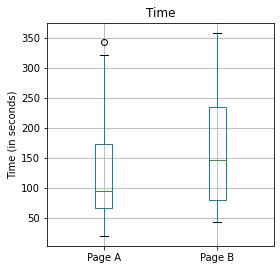

In [5]:
ax = session_times.boxplot(by='Page', column='Time', figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

In [9]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)

# 페이지 B는 페이지 A와 비교하여 세션 시간이 평균 36초 더 길다 -> 이게 우연에 의한 것인지 통계적으로 중요한 것인지 판단해야함
# -> 순열검정 사용 가능
# 모든 세션 시간을 결합 -> 잘 섞은 후 21개의 그룹(A), 15개의 그룹(B)으로 반복하여 표본을 추출하기

35.66666666666667


In [12]:
# 순열검정
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()
    
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]
print(perm_fun(session_times.Time, nA, nB))

88.92380952380952


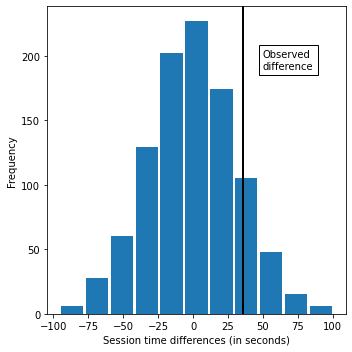

In [13]:
# 위 순열검정을 1000번 반복
random.seed(1)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# 우리가 위에서 계산한 36초 -> observed difference

In [14]:
perm_diffs = np.array(perm_diffs)
print(np.mean(perm_diffs > mean_b - mean_a))
# 세션 시간 차이 36초는 12.1%의 확률로 발생함 -> 이는 확률분포의 범위 내에 있음 -> 따라서 차이는 통계적으로 유의하지 않음

0.121


### 3.3.3 전체 및 부트스트랩 순열검정

순열검정의 두 가지 변종
- 전체순열검정(exhaustive permutation test): 데이터를 무작위로 섞고 나누는 대신 실제로 나눌 수 있는 모든 가능한 조합을 찾음 -> 정확한 결론을 보장 -> 정확검정(exact test)이라고도 함
- 부트스트랩 순열검정(bootstrap permutation test): 위 무작위 순열검정의 2단계와 3단계에서 비복원으로 하던 것을 복원 추출로 수행함

### 3.3.4 순열검정: 데이터 과학의 최종 결론

순열검정은 랜덤한 변이가 어떤 역할을 하는지 알아보기 위해 사용되는 휴리스틱한(시간이나 정보가 충분하지 않아 합리적인 판단을 할 수 없을 때, 혹은 굳이 합리적 판단을 할 필요가 없을 때 사람들이 신속하게 사용하는 어림짐작을 말한다.) 절차임
- 정확성을 보증할 수 없는, 수식에 기반을 둔 통계학이 빠지기 쉬운 형식주의와 '거짓 결정론'에 대한 유용한 위회로를 제공
- 재표본추출의 장점은 모두에게 맞는 접근 방식이라고 말할 수 있는 점
- 데이터가 정규분포를 따라야 한다는 가정도 필요가 없음

## 3.4 통계적 유의성과 p 값

통계적 유의성: 실험 결과가 유연히 일어난 것인지 아니면 일어날 수 없는 극단적인 것인지를 판단하는 방법 -> 우연히 벌어질 수 있는 변동성의 바깥에 존재한다면 이것을 통계적으로 유의하다고 말함

- p 값(p-value): 귀무가설을 구체화한 기회 모델이 주어졌을 때 관측된 결과와 같이 특이하거나 극단적인 결과를 얻을 확률
- alpha: 실제 결과가 통계적으로 의미 있는 것으로 간주되기 위해, 우연에 의한 결과가 능가해야 하는 '비정상적인' 가능성의 임계 확률
- 제 1종 오류(type 1 error): 우연에 의한 효과를 실제 효과라고 잘못 결론 내리는 것
- 제 2종 오류(type 2 error): 실제 효과를 우연에 의한 효과라고 잘못 결론 내리는 것

|결과|가격A|가격B|
|-|-|-|
|전환|200|182|
|전환되지 않음|23539|22406|

- A: $\frac{200}{23539+200} * 100 = 0.8425\%$
- B: $\frac{182}{22406+182} * 100 = 0.8057\%$
  
- 문제: A와 B의 전환율 차이가 우연에 의한 것인가?
    - 생각해야 할 점: 데이터는 꽤 많음(45000개 이상). 하지만 전환율이 너무 낮아 실제 필요한 표본크기를 결정하는 데 매우 중요한 값(전환 횟수)은 정작 너무 적음
    - 이럴 때 재표본추출 절차를 사용
        1. 0과 1이 적힌 카드를 박스에 넣음 -> 45945개의 0, 382개의 1이 됨(0.8246%)
        2. 크기가 23739(가격 A)인 표본을 섞어서 뽑고 그중 1이 몇 개인지 기록
        3. 나머지 22588개(가격 B)에서 1의 수를 기록
        4. 비율의 차이를 기록
        5. 반복
        6. 이 차이가 얼마나 자주 $>= 0.0368 = (0.8425 - 0.8057)$인가?

Observed difference: 0.0368%


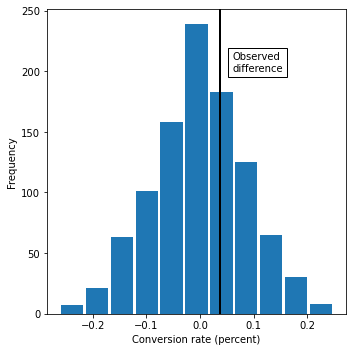

In [15]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()
# 그냥 우연한 차이구나

### 3.4.1 p 값

그래프를 보는 것보다 p 값과 같이 통계적 유의성을 정확히 측정하기 위한 지표가 필요

In [16]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))
# false=0, true=1로 계산해서 평균을 냄
# 0.332 = 우연히 얻은 결과의 33% 정도가 관찰한 것과 비슷하거나 더 크게 예외적인 결과를 얻을 것으로 기대됨

0.332


In [22]:
a = [1,2,3,4,5,6,7,8,9]
b = 4
c = [diff > b for diff in a]

In [23]:
c

[False, False, False, False, True, True, True, True, True]

In [24]:
np.mean(c)

0.5555555555555556

In [25]:
5/9

0.5555555555555556

In [26]:
# 사실 위 경우에는 p 값을 얻기 위해 순열검정을 할 필요가 없음 -> 가설이 이항분포를 따르기 때문에
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}') # single sided니까 나누기 2 해줌

p-value for single sided test: 0.3498


### 3.4.2 유의수준

많이 사용되는 유의수준(알파): 5%, 1% -> 랜덤 모델이 주어졌을 때, 극단적인 결과가 나올 확률은 어느 정도인가?

- p 값을 통해 전달하고자 하는 의미: 결과가 우연에서 비롯될 확률
- 실제 p 값이 나타내는 것: 랜덤 모델이 주어졌을 때, 그 결과가 관찰된 결과보다 더 극단적일 확률
- p 값이 유의미하다고 해서 그것이 바로 '증거'가 되는 것은 아님
- 결과가 통계적으로 유의미하다고 해서 실제적으로 유의미하다는 뜻은 아님

### 3.4.3 제 1종과 제 2종 오류
- 1종 오류: 어떤 효과가 우연히 발생한 것인데, 그것이 사살이라고 잘못 판단하는 경우 - `아파트에 불이 안났는데 경보 알람이 울림`
- 2종 오류: 어떤 효과가 실제로 있는 것인데, 그것이 우연히 발생한 것이라고 잘못 판단하는 경우 - `아파트에 불이 났는데 경보 알람이 울리지 않음`

## 3.5 t 검정(t-Tests)

- 검정통계량(test statistic): 관심의 차이 또는 효과에 대한 측정 지표
- t 통계량(t-statistic): 평균과 같이 표준화된 형태의 일반적인 검정통계량
- t 분포(t-distribution): 관측된 t 통계량을 비교할 수 있는, (귀무가설에서 파생된) 기준분포(자유도에 따라 모양이 다름, 자유도가 커질수록 표준정규분포에 가깝게 됨)
- t 검정(t-test): 모집단의 분산이나 표준편차를 알지 못할 때 모집단을 대표하는 표본으로부터 추정된 분산이나 표준편차를 가지고 검정하는 방법으로 “두 모집단의 평균간의 차이는 없다”라는 귀무가설과 “두 모집단의 평균 간에 차이가 있다”라는 대립가설 중에 하나를 선택할 수 있도록 하는 통계적 검정방법

  
모든 유의성검정은 관심 있는 효과를 측정하기 위한 검정통계량을 지정하고, 관찰된 효과가 정상적인 랜덤 변이의 범위 내에 있는지 여부를 판단하는 데 도움을 줌

1920, 1930년대에는 재표본 검정을 위해 무작위로 데이터를 수천 번 섞는 것이 거의 불가능했음 -> 윌리엄 고셋이 단일 표본평균의 분포를 근사화하기 위해 t 검정을 개발함 -> 통계학자들은 순열(섞인)분포에 대한 좋은 근사가 t 분포에 기초한 t 검정이라는 것을 발견함

In [34]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


In [35]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


## 3.6 다중검정

- 알파 인플레이션
    - 예시) 무의미하다고 옳게 검정할 확률 = 0.95
        - 10번 수행했는데 모두 무의미하다고 옳게 검정할 확률 = $0.95 ^ 10 = 0.6$
            - 적어도 하나의 예측값이 유의미하다고 검정 결과가 나올 확률 = 1 - 0.6 = `0.4`
        - 20번 수행했는데 모두 무의미하다고 옳게 검정할 확률 = $0.95 ^ 20 = 0.36$
            - 적어도 하나의 예측값이 유의미하다고 검정 결과가 나올 확률 = 1 - 0.36 = `0.64`
    - 1종 오류를 만들 확률인 알파가 더 많은 테스트를 수행할수록 증가하는 다중검정 현상
    
  
여러 처리군 간의 결과를 비교하는 경우, 각각의 경우에 여러 가지 질문을 하다 보니 질문 수가 늘어나는 만큼 우연에 속을 기회도 많아지겠지 -> 통계학의 수정(adjustment)절차: 보통 단일 가설검정을 할 때보다 통계적 유의성에 대한 기준을 더 `엄격하게 설정`함으로써 보완 -> 예를 들어 유의수준을 낮춤(잣대가 더욱 엄격해짐)

- 예측 모델링의 경우 교차타당성검사와 홀드아웃 표본 사용을 통해 위험을 낮춤
- 홀드아웃 표본이 없다면
    - 데이터를 더 여러 번 사용하고 조작할수록 우연이 더 큰 역할을 할 수 있다는 것을 인식해야 함
    - 재표본추출과 시뮬레이션 결과들을 사용해 무작위 모델의 기준값을 만들어 관찰된 결과를 비교함

## 3.7 자유도

자유도: 표본 데이터에서 계산된 통계량에 적용되며 변화가 가능한 값들의 개수
- 예시) 5개 샘플의 평균 = 5, 샘플 4개가 [5,5,5,5]면 마지막 샘플은 무조건 5, [4,6,3,7]이면 마지막 샘플은 무조건 5 -> 네 개의 값은 변할 수 있지만 이 값들이 정해지면 마지막 샘플은 고정됨 -> 자유도 4

- 다중공선성: 다중공선성(multicollinearity)란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우이다. 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다. 독립변수가 서로 의존하게 되면 이렇게 과대적합(over-fitting) 문제가 발생하여 회귀 결과의 안정성을 해칠 가능성이 높아진다.

## 3.8 분산분석

- 분산분석(analysis of variance, 줄여서 ANOVA): 여러 그룹 간의 통계적으로 유의미한 차이를 검정하는 통계적 절차
- 쌍별 비교(pairwise comparison): 여러 그룹 중 두 그룹 간의 (예를 들면 평균에 대한) 가설검정
- 총괄검정(omnibus test): 여러 그룹 평균들의 전체 분산에 관한 단일 가설검정
- 분산분해(decomposition of variance): 구성 요소 분리. 예를 들어 전체 평균, 처리 평균, 잔차 오차로부터 개별 값들에 대한 기여를 뜻함
- F 통계량(F-statistic): 그룹 평균 간의 차이가 랜덤 모델에서 예상되는 것에서 벗어나는 정도를 측정하는 표준화된 통계량
- SS(sum of squared): 어떤 평균으로부터의 편차들의 제곱합

In [58]:
four_sessions = pd.read_csv('./data/four_sessions.csv')
f = four_sessions.groupby('Page')
print('<mean>')
print(f.mean())
print('----')
print('<variance>')
print(f.mean().var())

<mean>
         Time
Page         
Page 1  172.8
Page 2  182.6
Page 3  175.6
Page 4  164.6
----
<variance>
Time    55.426667
dtype: float64


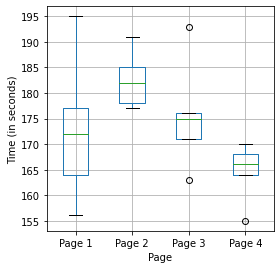

In [39]:
four_sessions = pd.read_csv('./data/four_sessions.csv')

ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

모든 페이지가 동일한 기본적인 값을 가지는가? 그리고 이들 사이의 차이는 우연에 의한 것이고 원래 4개의 페이지에 할당된 세션 시간 역시 무작위로 할당된 것인가? -> 전체적인 총괄검정을 ANOVA로 가능

1. 모든 데이터를 한 상자에 모은다.
2. 5개의 값을 갖는 4개의 재표본을 섞어서 추출한다.
3. 각 그룹의 평균을 기록한다.
4. 네 그룹 평균 사이의 분산을 기록한다.
5. 2~4단계를 반복한다.

In [59]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)
# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
26.30666666666669


Pr(Prob) 0.081


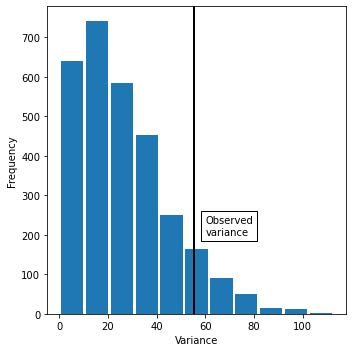

In [60]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# p값이 0.81 -> 네 페이지 사이의 값이 8.1% 확률로 실제 관측된 것과 달라지는 경우가 우연히 발생할 수 있음
# 임곗값 5%에 미치지 못하므로 네 페이지 간의 차이가 우연히 발생할 수 있다고 결론을 내림ㅡ

### 3.8.1 F 통계량

F-통계량은 두 분산의 비율 -> $\frac{표본 평균 간 퍼진 정도}{표본 내에서 퍼진 정도}$
- 표본 그룹 간의 차이가 랜덤하다면 표본 평균 간 퍼진 정도와 표본 내에서 퍼진 정도가 비슷해지겠지 -> 1이 됨
- 모든 표본집단들이 하나의 모집단에서 나오지 않았다면 표본 평균 간 퍼진 정도가 크겠지 -> 1보다 꽤 큰 값이 됨

In [61]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

# df=자유도, sum_sq=제곱합, mean_sq=평균제곱(평균제곱편차)
# 잔차의 자유도 16: 20개의 관측값 중 16개는 총평균과 처리 평균이 정해지면 달라질 수 있음

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


### 3.8.2 이원 분산분석

주말 대 평일 -> 그룹 a의 주말, 그룹 a의 평일, 그룹 b의 주말, 그룹 b의 평일 -> 이럴 때 필요한 것이 이원 분산분석

## 3.9 카이제곱검정

관찰된 빈도가 기대되는 빈도와 의미있게 다른지의 여부를 검정하기 위해 사용되는 검정방법

- 카이제곱통계량: 기댓값으로부터 어떤 관찰값까지의 거리를 나타내는 측정치
- 기댓값: 어떤 가정으로부터 데이터가 발생할 때, 그에 대해 기대하는 정도

### 3.9.1 카이제곱검정: 재표본추출 방법

||헤드라인 A|헤드라인 B|헤드라인 C|
|-|-|-|-|
|클릭|14|8|12|
|클릭하지 않음|986|992|988|

-> 재표본 추출을 통해 클릭률이 우연히 발생할 수 있는 것보다 유의미한 정도로 큰 것인지를 검정할 수 있음 -> 이 검정을 하려면 클릭의 '기대 분포'가 필요하며, 각 헤드라인 모두가 동일한 클릭률을 갖는다는 가정이 귀무가설에 속함

전체 클릭률 = $\frac{34}{3000}$

#### 3가지 헤드라인이 모두 같은 클릭률을 갖는다고 가정했을 때의 기댓값
||헤드라인 A|헤드라인 B|헤드라인 C|
|-|-|-|-|
|클릭|11.3|11.3|11.3|
|클릭하지 않음|988.67|988.67|988.67|

#### 피어슨 잔차(Pearson residual)
$$R=\frac{관측값 - 기댓값}{\sqrt{기댓값}}$$

#### 피어슨 잔차
||헤드라인 A|헤드라인 B|헤드라인 C|
|-|-|-|-|
|클릭|0.792|-0.990|0.198|
|클릭하지 않음|-0.085|0.106|-0.021|

### 카이제곱통계량 = 피어슨 잔차들의 제곱합
## $$X = Σ^r_iΣ^c_jR^2$$

문제에서의 카이제곱통계량 = 1.6666 -> 과연 이 값이 귀무가설로부터 얻을 수 있는 값보다 크다고 할 수 있을까? -> `재표본추출` 알고리즘으로 이를 검정할 수 있음

1. 34개의 1(클릭)과 2966개의 0(클릭하지 않음)이 들어있는 상자를 만듦
2. 상자의 내용물을 잘 섞은 뒤 1000개의 표본을 세 번씩 가져와서 각각의 클릭 수를 계산함
3. 이렇게 얻은 횟수와 기대한 횟수의 차이를 제곱해서 합산함
4. 2~3단계를 1000번 반복
5. 재표본추출을 통해 얻은 편차의 제곱합이 얼마나 자주 관측값을 초과하는가? -> 이것이 바로 `p값`임

In [63]:
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4820


In [64]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


### 3.9.3 카이제곱검정: 통계적 이론

점근적(asymptotic, 점점 가까워짐, 예: 동전 던지기 표본 크기가 무한대로 증가할 때 앞면이 나올 확률이 50%) 통계 이론은 카이제곱통계량의 분포가 카이제곱분포로 근사화될 수 있음을 보여줌 -> 적절한 표준 카이제곱분포는 자유도에 의해 결정됨
$$자유도 = (r-1)*(c-1)$$

r=행, c=열

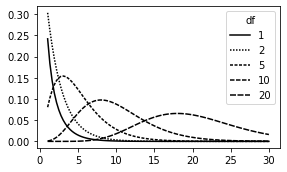

In [65]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

# 카이제곱분포
# 관찰된 통계량이 카이제곱분포의 바깥쪽에 위치할수록 p값이 작겠지(통계적으로 유의미하겠지, 우연이 아니겠지)

### 3.9.3 피셔의 정확검정

발생할 수 있는 모든 조합을 실제로 열거하고, 빈도를 집계하고, 관찰된 결과가 얼마나 극단적으로 발생할 수 있는지 정확하게 검정하는 절차

### 3.9.4 데이터 과학과의 관련성

데이터 과학 실험에서의 목표는 단순히 통계적 유의성을 조사하는 것이 아니라 최적의 처리 방법을 찾는 것 -> 하지만 데이터 과학에서도 집계 비율이 너무 낮아 실험을 통해 확실한 결론을 내리기 어려운 경우 피셔의 정확검정, 카이제곱검정, 그리고 기타 검정은 검정력이나 표본크기를 계산하는 데 유용할 수 있음

## 3.10 멀티암드 밴딧 알고리즘

- 그리디 알고리즘
$$A_t = argmax_aQ_t(a)$$
- 입실론 그리디
    1. 0부터 1 사이의 균등분포의 난수를 생성
    2. 이 숫자가 0과 입실론 사이에 존재하면 동전 뒤집기를 시행
        - 앞면이면 a
        - 뒷면이면 b
    3. 숫자가 입실론보다 크면 지금까지 가장 좋은 결과를 보인 제안을 표시
- 톰슨의 샘플링
    - 각 추출 정보가 누적되면서 정보가 업데이트되기 때문에, 다음번에 최고 손잡이를 선택할 확률을 효과적으로 최적화할 수 ㅣㅇㅆ음
    $$A_t = argmax_a[Q_t(a)+ c*\frac{\log{t}}{N_t(a)}]$$
    - 그리디 알고리즘 수식과 비슷한데 뒤에 뭐가 추가됨
        - $c$는 탐험의 정도를 조절할 수 있는 하이퍼파라미터
        - $N_t(a)$는 해당 슬롯머신을 선택했던 횟수
        - $t$는 모든 슬롯머신을 선택한 횟수의 합

## 3.11 검정력과 표본크기

- 효과크기: '클릭률의 20% 향상'과 같이 통계 검정을 통해 판단할 수 있는 효과의 최소 크기
- 검정력(power): 주어진 표본크기로 주어진 효과크기를 알아낼 확률
- 유의수준: 검증 시 사용할 통계 유의수준

예) 야구에서 3할 5푼 타자와 2할 타자를 구분하기 위해서는 많은 타석이 필요하지 않음. 하지만 3할 5푼 타자와 3할 3푼 타자를 구분하기 위해서는 더 많은 타석 정보가 필요할 것임.

예) 25타석에서 3할 5푼 타자와 2할 타자를 구분할 수 있을 확률이 0.75라고 가정하면
- 효과크기 = 0.35 - 0.2 = 0.15
- 검정력 = 0.75

### 3.11.1 표본크기

검정력 계산의 주된 용도는 표본크기가 어느 정도 필요한가를 추정하는 것임

예를 들어 기존 광고와 새로운 광고를 비교하기 위해 클릭률을 조사한다고 가정 -? 이 조사를 위해 얼마나 많은 클릭 수를 수집해야 할까? -> 큰 차이에만 관심이 있다면 상대적으로 적은 수의 표본으로도 괜찮음. 하지만 매우 작은 차이에도 관심이 있다면 훨씬 큰 표본이 필요할 것임.

다시 말해 새 광고가 기존 광고에 비해 얼만큼 더 효과적이어야 하는지 -> 효과크기 -> 따라서 효과크기가 표본크기를 좌우함

In [67]:
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

# 1.21%와 1.1%, 검정력=0.8 -> 116602의 표본이 필요

Sample Size: 116602.393


In [68]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

# 1.65%와 1.1%, 검정력=0.8 -> 5488의 표본이 필요

Sample Size: 5488.408
